<a href="https://colab.research.google.com/github/brrsanchezfi/Circuitos_2022_1/blob/main/DATOS_ENERGETICOS-modelo-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema 04: precio de la energía
Contexto
El Mercado de Energía Mayorista es el escenario en el que se negocia la compraventa de energía. Cada día los agentes generadores deben hacer una oferta, que consiste en declarar cuánta energía puede vender a cada hora del día siguiente, y a qué precio.

Los precios de cada oferta dependen de muchos factores, siendo el principal de ellos cuál es el recurso energético que se usa para generar la energía eléctrica. Los costos de obtener energía eléctrica con una hidroeléctrica o una termoeléctrica son muy diferentes, entre otras cosas porque el agua, el carbón, el gas y el fuel oil tienen precios diferentes.

Después de recibidas las ofertas, el operador del mercado decide cuánta energía debe comprarse a cada agente en cada franja horaria. Para cada franja, el precio más elevado de compra determina el precio de bolsa para esa franja. Puede promediarse ese valor para las 24 franjas horarias, para obtener el Precio Ponderado de Bolsa.

La Unidad de Planeación Minero Energética del Ministerio de Minas evalúa permanentemente escenarios energéticos factibles a futuro. Uno de los aspectos que debe considerarse es el efecto de los precios de los recursos energéticos en el precio de la energía eléctrica. Por esta razón, se necesita entender cuál es el impacto del precio de cada recurso en el precio de bolsa.

Descripción de la tarea:
La tarea consiste en buscar una explicación de los precios de bolsa diarios (mínimo, máximo y ponderado), a partir de los precios diarios ponderados de los recursos de generación.

Datos primarios disponibles
XM publica el precio ponderado de oferta para cada recurso energético día a día; también publica información relativa al precio de bolsa 6 . Con esa información se ha construido un archivo que recoge los precios diarios de Agua, Carbón, Gas, Líquidos, y los precios de bolsa máximo, mínimo, ponderado; también se ha adicionado el precio promedio mensual de bolsa. El archivo toma valores desde enero del 2015 hasta marzo del 2022 y está disponible en este enlace

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install pydataxm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

url_data = "https://raw.githubusercontent.com/ogduartev/energyDataScience/main/data/stock/sample01.csv"

data = pd.read_csv(url_data)

In [ ]:
data.head(-6)

,Fecha,AGUA,CARBON,GAS,LIQUIDOS,PPP Bolsa Mes,Precio Min. Bolsa diario,Precio Max. Bolsa diario,PPP Bolsa diario
0,2015-01-01 00:00:00,187.381526,123.225318,204.977354,971.700598,189.972555,111.699107,212.210107,179.685917
1,2015-01-02 00:00:00,179.863045,119.771853,208.442936,971.705305,189.972555,84.480854,248.480854,187.894382
2,2015-01-03 00:00:00,202.829047,123.878501,213.453856,971.381271,189.972555,153.869354,248.869354,201.160360
3,2015-01-04 00:00:00,230.330204,124.526534,212.540171,947.097082,189.972555,122.913838,242.913838,238.800040
4,2015-01-05 00:00:00,205.850445,125.271973,212.464471,979.080505,189.972555,143.603771,251.603771,214.787935
...,...,...,...,...,...,...,...,...,...
2636,2022-03-21 00:00:00,169.983850,265.026040,687.491891,741.795282,229.404707,197.945193,242.839193,212.085893
2637,2022-03-22 00:00:00,144.532941,262.757030,711.510022,741.795282,229.404707,192.178599,239.178599,219.918100
2638,2022-03-23 00:00:00,140.506159,262.757030,728.304172,741.795282,229.404707,93.363296,287.548296,217.057160
2639,2022-03-24 00:00:00,157.967737,262.757030,726.294520,707.583803,229.404707,210.994324,271.474324,238.897485


In [ ]:
data.describe()

,AGUA,CARBON,GAS,LIQUIDOS,PPP Bolsa Mes,Precio Min. Bolsa diario,Precio Max. Bolsa diario,PPP Bolsa diario
count,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000
mean,195.504657,158.585494,400.533051,660.783921,224.128882,182.603472,263.774915,224.128882
std,189.632636,26.684211,112.345729,129.374901,177.659512,169.850166,215.909416,195.024597
min,56.209376,85.951348,169.704209,377.156842,68.677333,46.791501,61.172757,61.172757
25%,92.853401,138.128833,337.684705,569.069081,115.672436,86.940767,143.023278,115.651374
50%,131.093969,158.789273,401.306083,648.078142,168.453381,129.276695,200.655142,162.496191
75%,200.713812,175.327640,449.029602,742.263914,272.216995,200.913862,303.668646,251.722811
max,1318.605864,265.948895,816.089919,1035.447323,1117.271286,1940.776133,2821.520551,1942.711893


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha                     2647 non-null   object 
 1   AGUA                      2647 non-null   float64
 2   CARBON                    2647 non-null   float64
 3   GAS                       2647 non-null   float64
 4   LIQUIDOS                  2647 non-null   float64
 5   PPP Bolsa Mes             2647 non-null   float64
 6   Precio Min. Bolsa diario  2647 non-null   float64
 7   Precio Max. Bolsa diario  2647 non-null   float64
 8   PPP Bolsa diario          2647 non-null   float64
dtypes: float64(8), object(1)
memory usage: 186.2+ KB


In [ ]:
columnas_interes = ['AGUA', 'CARBON', 'GAS', 'LIQUIDOS', 'Precio Min. Bolsa diario', 'Precio Max. Bolsa diario', 'PPP Bolsa diario']
matriz_correlacion = data[columnas_interes].corr()
print(matriz_correlacion)

                              AGUA    CARBON       GAS  LIQUIDOS  \
AGUA                      1.000000  0.055684 -0.224208 -0.311800   
CARBON                    0.055684  1.000000  0.728208 -0.177215   
GAS                      -0.224208  0.728208  1.000000 -0.036739   
LIQUIDOS                 -0.311800 -0.177215 -0.036739  1.000000   
Precio Min. Bolsa diario  0.929032  0.081109 -0.147821 -0.284567   
Precio Max. Bolsa diario  0.916915  0.069565 -0.156233 -0.258415   
PPP Bolsa diario          0.950011  0.071525 -0.162392 -0.278463   

                          Precio Min. Bolsa diario  Precio Max. Bolsa diario  \
AGUA                                      0.929032                  0.916915   
CARBON                                    0.081109                  0.069565   
GAS                                      -0.147821                 -0.156233   
LIQUIDOS                                 -0.284567                 -0.258415   
Precio Min. Bolsa diario                  1.000000     

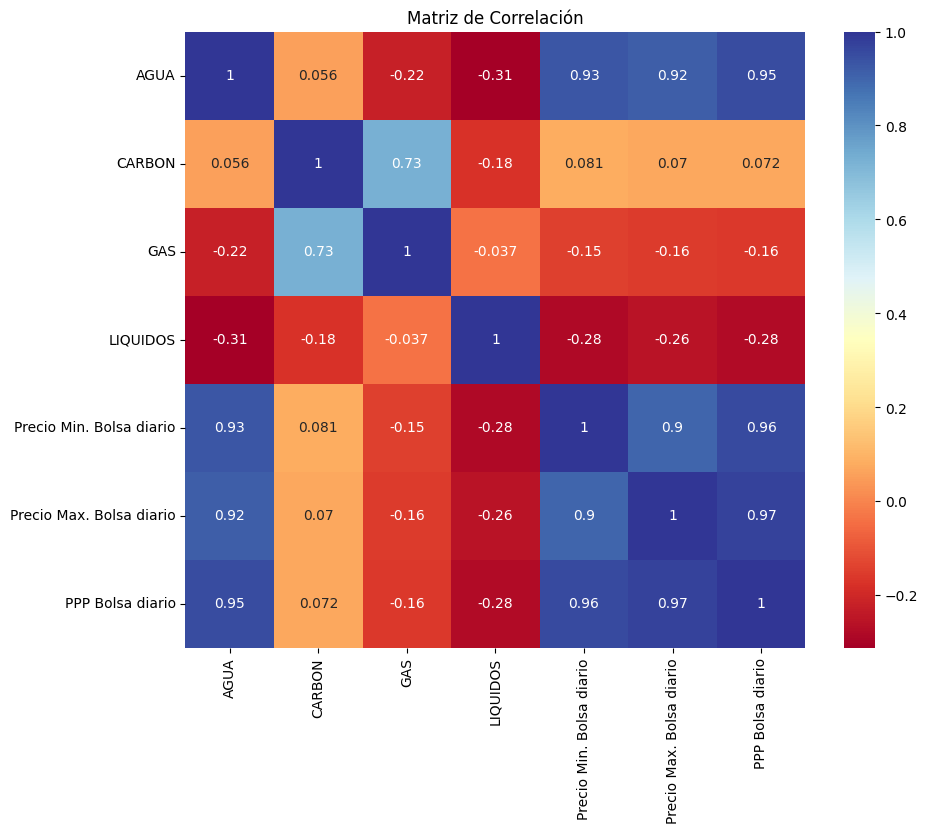

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="RdYlBu", ax=ax)

# Configurar el título del gráfico
ax.set_title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

In [ ]:
data.columns

Index(['Fecha', 'AGUA', 'CARBON', 'GAS', 'LIQUIDOS', 'PPP Bolsa Mes',
       'Precio Min. Bolsa diario', 'Precio Max. Bolsa diario',
       'PPP Bolsa diario'],
      dtype='object')

In [ ]:
X = data[['AGUA', 'CARBON', 'GAS', 'LIQUIDOS']]
y = data['PPP Bolsa diario']
modelo = LinearRegression().fit(X, y)
predicciones = modelo.predict(X)



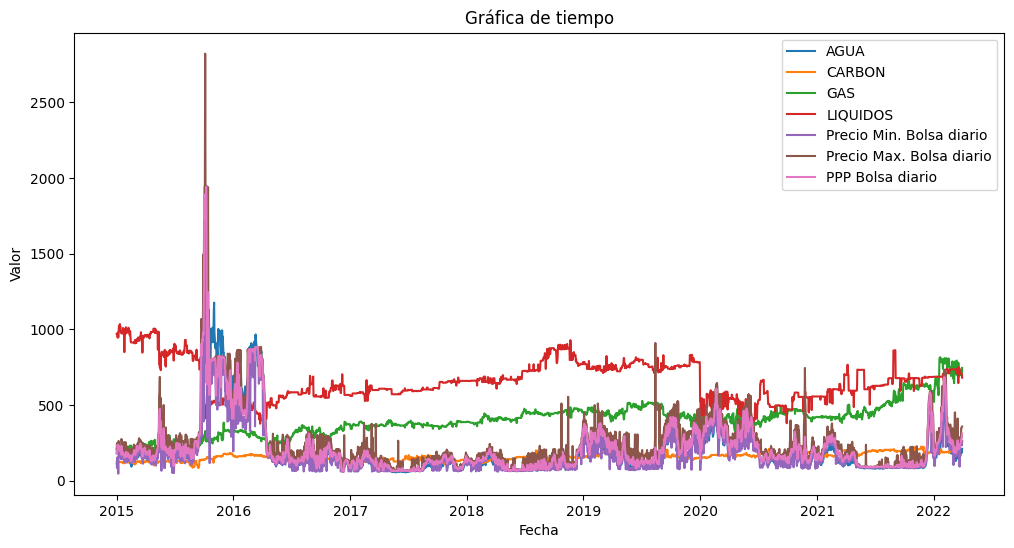

In [ ]:
#grafica de los consumos por tiempo

data['Fecha'] = pd.to_datetime(data['Fecha'])
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Gráfica para cada columna (excepto la columna 'Fecha')
columnas = data[['AGUA', 'CARBON', 'GAS', 'LIQUIDOS',
       'Precio Min. Bolsa diario', 'Precio Max. Bolsa diario',
       'PPP Bolsa diario']]  # Excluye la columna 'Fecha'
for columna in columnas:
    plt.plot(data['Fecha'], data[columna], label=columna)

# Configuración adicional
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Gráfica de tiempo')
plt.legend()

# Mostrar la gráfica
plt.show()

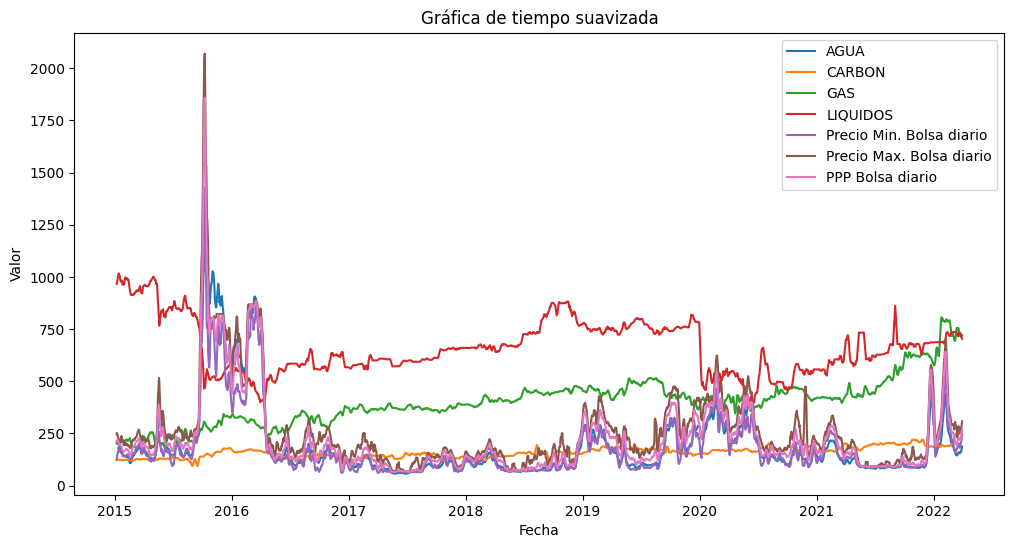

In [ ]:

# Suavizado con promedio móvil
window_size = 7  # Tamaño de la ventana del promedio móvil
smoothed_df = data.iloc[:, 1:].rolling(window=window_size).mean()
smoothed_df.insert(0, 'Fecha', data['Fecha'])

# Configurar la gráfica
plt.figure(figsize=(12, 6))

# Gráfica para cada columna (excepto la columna 'Fecha')
columnas = data[['AGUA', 'CARBON', 'GAS', 'LIQUIDOS',
       'Precio Min. Bolsa diario', 'Precio Max. Bolsa diario',
       'PPP Bolsa diario']]  # Excluye la columna 'Fecha'
for columna in columnas:
    plt.plot(smoothed_df['Fecha'], smoothed_df[columna], label=columna)

# Configuración adicional
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Gráfica de tiempo suavizada')
plt.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
X.info

<bound method DataFrame.info of             AGUA      CARBON         GAS    LIQUIDOS
0     187.381526  123.225318  204.977354  971.700598
1     179.863045  119.771853  208.442936  971.705305
2     202.829047  123.878501  213.453856  971.381271
3     230.330204  124.526534  212.540171  947.097082
4     205.850445  125.271973  212.464471  979.080505
...          ...         ...         ...         ...
2642  182.604901  262.813092  697.442903  707.583803
2643  198.853818  262.813092  728.107974  707.583803
2644  202.910992  253.749212  709.119964  707.583803
2645  184.610429  258.967234  718.866090  707.583803
2646  211.776199  264.869713  746.026954  681.372044

[2647 rows x 4 columns]>

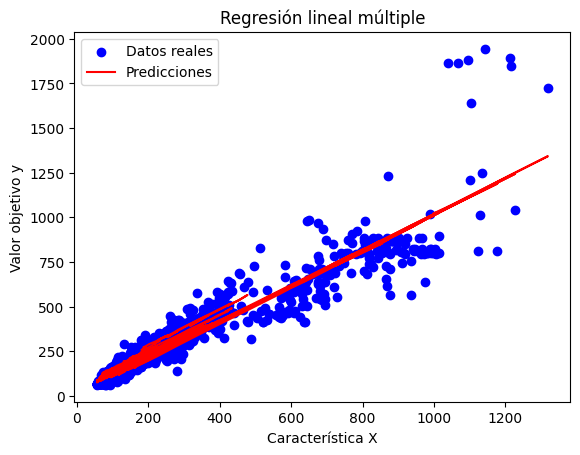

In [ ]:
plt.scatter(X.AGUA, y, color='blue', label='Datos reales')
plt.plot(X.AGUA, predicciones , color='red', label='Predicciones')
plt.xlabel('Característica X')
plt.ylabel('Valor objetivo y')
plt.title('Regresión lineal múltiple')
plt.legend()
plt.show()

In [ ]:
r2 = modelo.score(X, y)
r2

0.9066927656590114

In [ ]:
X = data[['AGUA']]
y = data['PPP Bolsa diario']
modelo = LinearRegression().fit(X, y)
predicciones = modelo.predict(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
y_pred_test = modelo.predict(X_test)

ValueError: ignored

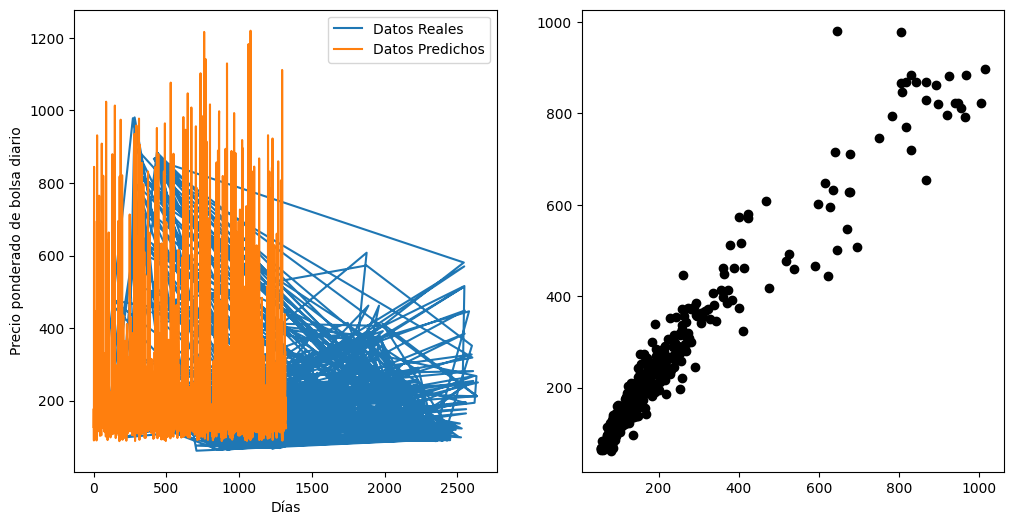

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Comparación de los precios de bolsa reales y predichos
ax1.plot(y_test, label='Datos Reales')
ax1.plot(y_pred_test, label='Datos Predichos')
ax1.set_xlabel('Días')
ax1.set_ylabel('Precio ponderado de bolsa diario')
ax1.legend()




# Gráfico 2: Visualización de los datos de prueba y la regresión lineal múltiple
ax2.scatter(X_test.iloc[:,0], y_test, color='black', label='Datos')
ax2.plot(X_test.iloc[:,0], y_pred_test, color='blue', linewidth=3, label='Regresión Lineal Múltiple')
ax2.set_xlabel('Precio ponderado de oferta de AGUA')
ax2.set_ylabel('Precio ponderado de bolsa diario')
ax2.legend()
plt.show()

In [ ]:
from pydataxm import *          # Importa la libreria que fue instalada con pip install pydataxm o tambien desde GitHub
from pydataxm.pydataxm import ReadDB as apiXM    #Se importa la clase que invoca el servicio
import datetime as dt           # Permite trabajar con fechas

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2647 entries, 0 to 2646
Series name: PPP Bolsa diario
Non-Null Count  Dtype  
--------------  -----  
2647 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


In [ ]:
# Extraer las columnas necesarias
X = data[['AGUA']]  # Solo se utiliza la columna 'AGUA' como característica de entrada
y = data['PPP Bolsa diario']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Construcción del modelo
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='linear'))  # Solo se utiliza una característica de entrada

# Paso 4: Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Paso 5: Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Paso 6: Evaluación del modelo
loss = model.evaluate(X_test, y_test)
print('Loss:', loss)
# Paso 7: Predicciones
predictions = model.predict(X_test)

Epoch 1/10
67/67 [==============================] - 0s 1ms/step - loss: 117080.0234
Epoch 2/10
67/67 [==============================] - 0s 1ms/step - loss: 106412.9688
Epoch 3/10
67/67 [==============================] - 0s 1ms/step - loss: 96444.1094
Epoch 4/10
67/67 [==============================] - 0s 1ms/step - loss: 87306.7266
Epoch 5/10
67/67 [==============================] - 0s 1ms/step - loss: 78818.0469
Epoch 6/10
67/67 [==============================] - 0s 1ms/step - loss: 70780.0312
Epoch 7/10
67/67 [==============================] - 0s 1ms/step - loss: 63599.5469
Epoch 8/10
67/67 [==============================] - 0s 1ms/step - loss: 57073.0312
Epoch 9/10
67/67 [==============================] - 0s 1ms/step - loss: 51115.6211
Epoch 10/10
17/17 [==============================] - 0s 1ms/step - loss: 36639.5234
Loss: 36639.5234375
17/17 [==============================] - 0s 1ms/step


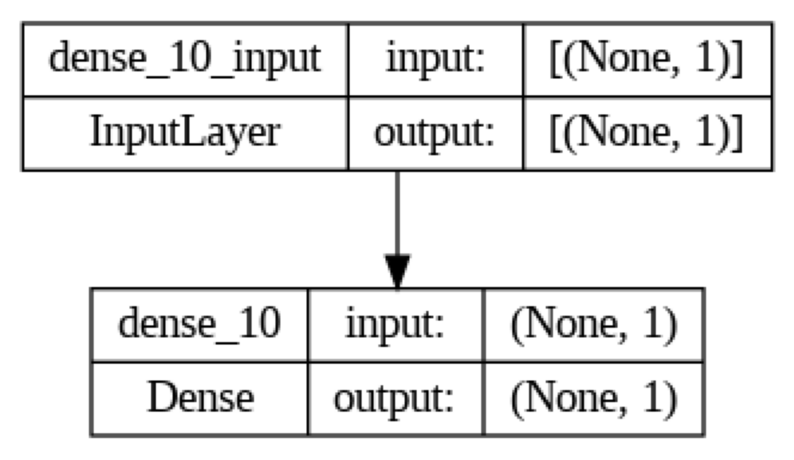

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Paso 1: Preparación de los datos (mismo código que en el ejemplo anterior)

# Paso 3: Construcción del modelo (mismo código que en el ejemplo anterior)

# Paso 4: Compilación del modelo (mismo código que en el ejemplo anterior)

# Graficar el modelo
plot_model(model, to_file='modelo.png', show_shapes=True, show_layer_names=True)

# Visualizar la imagen del modelo
img = plt.imread('modelo.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

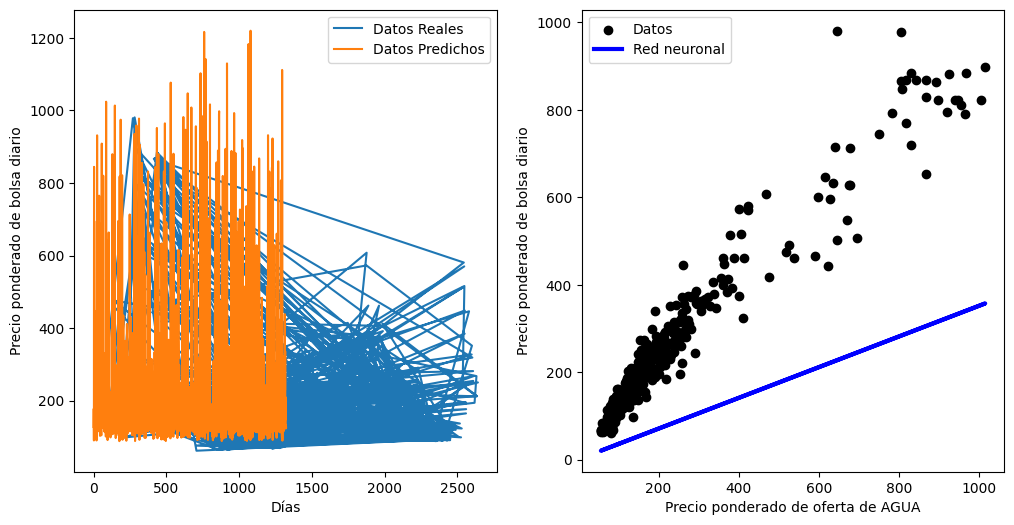

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Comparación de los precios de bolsa reales y predichos
ax1.plot(y_test, label='Datos Reales')
ax1.plot(y_pred_test, label='Datos Predichos')
ax1.set_xlabel('Días')
ax1.set_ylabel('Precio ponderado de bolsa diario')
ax1.legend()




# Gráfico 2: Visualización de los datos de prueba y la regresión lineal múltiple
ax2.scatter(X_test.iloc[:,0], y_test, color='black', label='Datos')
ax2.plot(X_test.iloc[:,0],predictions, color='blue', linewidth=3, label='Red neuronal')
ax2.set_xlabel('Precio ponderado de oferta de AGUA')
ax2.set_ylabel('Precio ponderado de bolsa diario')
ax2.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Calcular el MSE en los datos de prueba
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
from sklearn.metrics import r2_score

# Calcular el R^2 score en los datos de prueba
r2 = r2_score(y_test, predictions)
print('R^2 score:', r2)
from sklearn.metrics import mean_absolute_error

# Calcular el MAE en los datos de prueba
mae = mean_absolute_error(y_test, predictions)
print('MAE:', mae)


MSE: 36639.52310491483
R^2 score: -0.14709937325696343
MAE: 152.38070086700301
